In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data Exploration

In [2]:
features = np.load('./inputs.npy')
print features.shape

(29413, 96, 76)


## Each data sample corresponds to a sequence of clinical measurements - 76 variables measured at every hour in the ICU

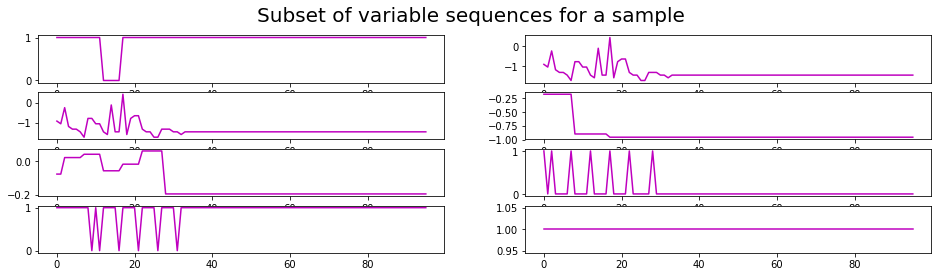

In [64]:
randid = 1000
fig,ax = plt.subplots(4,2,figsize=(16,4))

for i in range(4):
    for j in range(2):
        k = np.random.choice(76)
        vs = features[randid,:,k].ravel()
        while np.sum(vs) == 0:
            k = np.random.choice(76)
            vs = features[randid,:,k].ravel()
        ax[i,j].plot(range(96),vs,'m-')
fig.suptitle('Subset of variable sequences for a sample',fontsize=20)
plt.show()

## Obtain 2D visualization using UMAP algorithm by vectorizing the sequences into HD features 

In [32]:
vecs = features.reshape([features.shape[0],-1])
print vecs.shape

(29413, 7296)


In [42]:
from sklearn.decomposition import PCA
from umap import UMAP

In [43]:
clf = UMAP(n_components=2)
clf.fit(vecs)

UMAP(a=1.5769434603113077, alpha=1.0, angular_rp_forest=False,
   b=0.8950608779109733, gamma=1.0, init='spectral', metric='euclidean',
   metric_kwds={}, min_dist=0.1, n_components=2, n_edge_samples=None,
   n_neighbors=15, random_state=None, spread=1.0, verbose=False)

In [48]:
vecs_2D = clf.embedding_
print vecs_2D.shape

(29413, 2)


Text(0.5,1,'2D Embedding of the Patient Data')

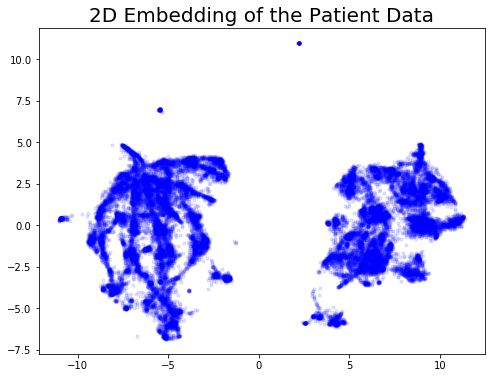

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(vecs_2D[:,0],vecs_2D[:,1],s=10,c='blue',alpha = 0.1, marker='o')
plt.title('2D Embedding of the Patient Data',fontsize=20)